In [1]:
#!/usr/bin/env python3
from cifar10 import CIFAR10
import tensorflow as tf
import numpy as np
import argparse
import datetime
import os
import re
# Report only TF errors by default
os.environ.setdefault("TF_CPP_MIN_LOG_LEVEL", "2")

# 2f67b427-a885-11e7-a937-00505601122b
# c751264b-78ee-11eb-a1a9-005056ad4f31

# TODO: Define reasonable defaults and optionally more parameters
parser = argparse.ArgumentParser()
parser.add_argument("--batch_size", default=72, type=int, help="Batch size.")
parser.add_argument("--epochs", default=15,
                    type=int, help="Number of epochs.")
parser.add_argument("--seed", default=42, type=int, help="Random seed.")
parser.add_argument("--threads", default=1, type=int,
                    help="Maximum number of threads to use.")


args = parser.parse_args([] if "__file__" not in globals() else None)


In [2]:
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [3]:



# Fix random seeds and threads
np.random.seed(args.seed)
tf.random.set_seed(args.seed)
tf.config.threading.set_inter_op_parallelism_threads(args.threads)
tf.config.threading.set_intra_op_parallelism_threads(args.threads)

# Create logdir name
args.logdir = os.path.join("logs", "{}-{}-{}".format(
    os.path.basename(globals().get("__file__", "notebook")),
    datetime.datetime.now().strftime("%Y-%m-%d_%H%M%S"),
    ",".join(("{}={}".format(re.sub(
        "(.)[^_]*_?", r"\1", key), value) for key, value in sorted(vars(args).items())))
))

# Load data
cifar = CIFAR10()
# TODO: Create the model and train it
input_l = tf.keras.layers.Input(shape=(32, 32, 3))
x = input_l


x = tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='selu')(x)
x = tf.keras.layers.BatchNormalization()(x)

res = x
x = tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='selu')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='selu')(x)
x = tf.keras.layers.Add()([res,x])
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D()(x)

x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1, activation='selu')(x)
x = tf.keras.layers.BatchNormalization()(x)

res = x
x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1, activation='selu')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1, activation='selu')(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1, activation='selu')(x)
x = tf.keras.layers.Add()([res,x])
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D()(x)

x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1, activation='selu')(x)
x = tf.keras.layers.BatchNormalization()(x)
res = x
x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1, activation='selu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1, activation='selu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1, activation='selu')(x)
x = tf.keras.layers.Add()([res,x])

x = tf.keras.layers.MaxPool2D()(x)


x = tf.keras.layers.Conv2D(128, (3, 3), padding='same', strides=1, activation='selu')(x)
x = tf.keras.layers.BatchNormalization()(x)
res = x
x = tf.keras.layers.Conv2D(128, (3, 3), padding='same', strides=1, activation='selu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, (3, 3), padding='same', strides=1, activation='selu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(128, (3, 3), padding='same', strides=1, activation='selu')(x)
x = tf.keras.layers.Add()([res,x])

x = tf.keras.layers.MaxPool2D()(x)

for i in range(0):
    res = x
    x = tf.keras.layers.Conv2D(64, (3, 3), padding='same')(x)
    #x = tf.keras.layers.Dropout(0.5)(x)

    x = tf.keras.layers.ReLU()(x)
    #x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Conv2D(64, (3, 3), padding='same')(x)
    #x = tf.keras.layers.Dropout(0.5)(x)

    x = tf.keras.layers.ReLU()(x)
    #x = tf.keras.layers.BatchNormalization()(x)
    #x = tf.keras.layers.Concatenate()([res,x])
    x = tf.keras.layers.MaxPool2D()(x)


x = tf.keras.layers.Flatten()(x)
#x = tf.keras.layers.Dense(128, activation='selu')(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=input_l, outputs=x )

model.compile(
    optimizer=tf.optimizers.Adam(0.0005),
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.metrics.SparseCategoricalAccuracy(name="accuracy")]
)
model.summary()

#train_generator = tf.keras.preprocessing.image.ImageDataGenerator( rotation_range=5, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)

#model.fit(train_generator.flow(cifar.train.data["images"], cifar.train.data["labels"], batch_size=args.batch_size),
#          epochs=args.epochs, validation_data=(cifar.dev.data["images"], cifar.dev.data["labels"]), shuffle=False)

# Generate test set annotations, but in args.logdir to allow parallel execution.
# with open(os.path.join(args.logdir, "cifar_competition_test.txt"), "w", encoding="utf-8") as predictions_file:
#     for probs in model.predict(cifar.test.data["images"], batch_size=args.batch_size):
#         print(np.argmax(probs), file=predictions_file)



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   9248        batch_normalization[0][0]        
______________________________________________________________________________________________

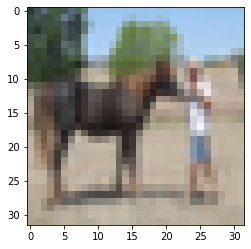

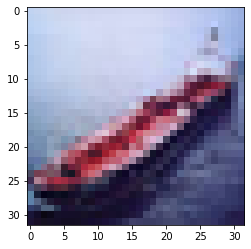

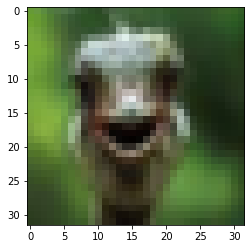

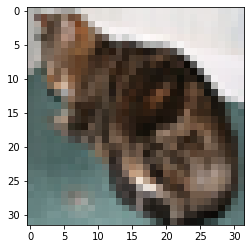

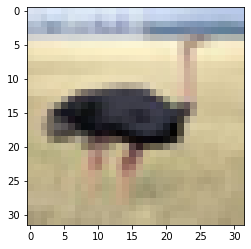

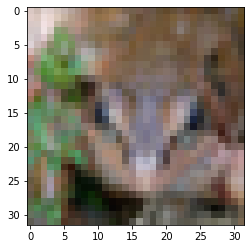

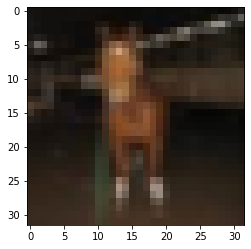

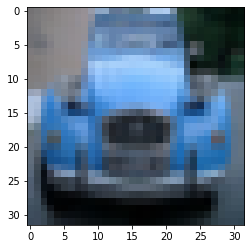

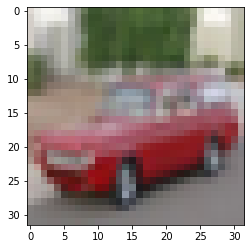

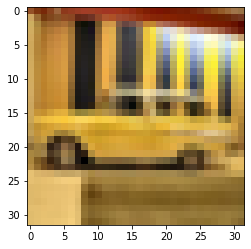

In [81]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.imshow( cifar.train.data["images"][i] )
    plt.show()

In [11]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator( rotation_range=5, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

model.fit(train_generator.flow(cifar.train.data["images"], cifar.train.data["labels"], batch_size=512), batch_size=512,
          epochs=52, validation_data=(cifar.dev.data["images"], cifar.dev.data["labels"]), shuffle=True)

Epoch 1/52
88/88 [==============================] - 37s 412ms/step - loss: 1.4651 - accuracy: 0.4836 - val_loss: 2.8769 - val_accuracy: 0.2442
Epoch 2/52
88/88 [==============================] - 33s 376ms/step - loss: 1.1881 - accuracy: 0.5808 - val_loss: 2.6066 - val_accuracy: 0.2310
Epoch 3/52
49/88 [===============>..............] - ETA: 14s - loss: 1.0738 - accuracy: 0.6210

KeyboardInterrupt: 

In [ ]:
n, h, w, c = cifar.train.data["images"].shape
x = np.zeros( (n*2,h,w,c)  )
x[:n] = cifar.train.data["images"]
x[n:] = cifar.train.data["images"][:,:,::-1]

y = np.zeros((n*2))
y[:n] = cifar.train.data["labels"]
y[n:] = cifar.train.data["labels"]
model.fit(x, y, batch_size=128 ,
         epochs=35, validation_data=(cifar.dev.data["images"], cifar.dev.data["labels"]), shuffle=True )


Epoch 1/35
226/704 [========>.....................] - ETA: 20s - loss: 1.1876 - accuracy: 0.5951

In [73]:
len(cifar.train.data["images"])

45000

In [17]:
from tensorflow.keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.00001)

In [77]:
# Generate test set annotations, but in args.logdir to allow parallel execution.
with open("cifar_competition_test.txt", "w", encoding="utf-8") as predictions_file:
    for probs in model.predict(cifar.test.data["images"], batch_size=args.batch_size):
        print(np.argmax(probs), file=predictions_file)